# LINEAR REGRESSION FROM SCRATCH
<h3>(Multiple classes)</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.patches as mpatches

In [2]:
def Slope(a,b):
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    slope=(n*two_sum-sumX*sumY)/(n*sumX_2-(sumX)**2)
    return slope

In [3]:
def Intercept(a,b):
    intercept=np.mean(b)-Slope(a,b)*np.mean(a)
    return intercept

In [4]:
def Predictions(slope,x_input,intercept):
    predict=slope*x_input + intercept
    return predict

In [5]:
def R_squared(predicted_values,test_values):
    f=predicted_values
    y=test_values
    print(f,'\n\n',y)
    ss_total=np.sum((y-np.mean(y))**2)
    ss_res=np.sum((y-f)**2)
    R_2=1-(ss_res/ss_total)
    return R_2

In [6]:
def correlation_coeff(predicted_values,test_values):
    a=predicted_values
    b=test_values
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    sumY_2=np.sum(b**2)
    score=(n*two_sum-sumX*sumY)/np.sqrt((n*sumX_2-(sumX)**2)*(n*sumY_2-(sumY)**2))
    return score

In [7]:
def Covariance(X,Y):
    a=X
    b=Y
    n=len(a)
    two_sum=np.sum(a*b)
    cov=two_sum/n-np.mean(a)*np.mean(b)
    return cov

In [10]:
dataset=pd.read_csv('Salary_Data.csv') 

In [11]:
array = dataset.values
X = array[:,0]
print(X.shape)
Y = array[:,1]
print(Y.shape)

(30,)
(30,)


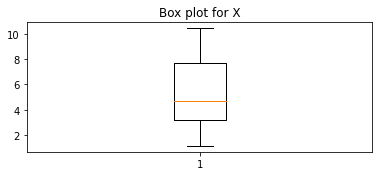

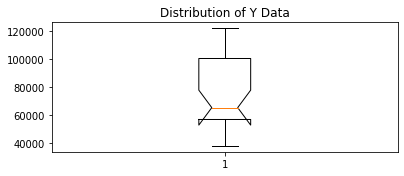

In [12]:
left = 0.1
width = 0.8
ax1 = plt.axes([left, 0.5, width, 0.45])
ax1.boxplot(X)
ax1.set_title('Box plot for X')
plt.show()
ax2 = plt.axes([left, 0.5, width, 0.45])
ax2.boxplot(Y, '.-')
ax2.set_title('Distribution of Y Data')
plt.show()

In [13]:
print(Covariance(X,Y))

73569.4266666667


In [14]:
test_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size= test_size, random_state=seed)

In [15]:
intercept=Intercept(X_train,Y_train)
slope=Slope(X_train,Y_train)
print(intercept,slope)
predictions=Predictions(slope=slope,x_input=X_validation,intercept=intercept)
print(predictions)
print(R_squared(predicted_values=predictions,test_values=Y_validation))
print(correlation_coeff(test_values=Y_validation,predicted_values=predictions))

24525.04300166155 9589.490012922264
[38909.27802104 75349.34007015 36991.38001846]
[38909.27802104 75349.34007015 36991.38001846] 

 [37731. 83088. 46205.]
0.8743350638929306
0.975680209596182


In [16]:
y=slope*X+intercept

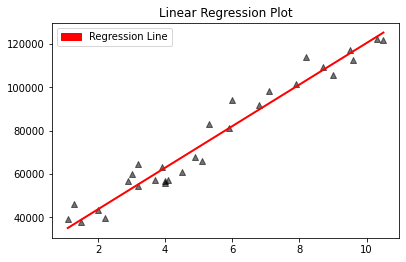

In [18]:
plt.scatter(X,Y,marker='^',color='k',alpha=0.55)
plt.plot(X,y,color='Red',linewidth=2)
red_patch = mpatches.Patch(color='red', label='Regression Line')
plt.legend(loc=0,handles=[red_patch])
plt.title('Linear Regression Plot')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

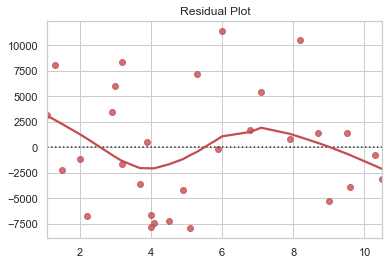

In [19]:
sns.set(style="whitegrid")

rs = np.random.RandomState(7)

sns.residplot(X, Y, lowess=True, color="r")
plt.title('Residual Plot')
plt.show()